<a href="https://colab.research.google.com/github/Xeriou/THU_Teach/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線性回歸 - 房價預測

## 所需套件


   1. numpy - 矩陣處理的套件
   2. matplotlib - 資料視覺化套件
   3. seaborn - 資料視覺化套件，是 matplotlib 在封裝而成，目的是方便呼叫特殊的圖表
   4. pandas - 資料處理套件，在 numpy 基礎上加入許多常用的資料處理方法
   5. sklearn - 科學運算套件
        1. linear_model：有關回歸方程的方法
        2. metrics：量測運算結果的方法
        3. model_selection train_test_split：方便資料分割的方法


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score # 衡量模型的標準
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

## Data Import - 資料匯入、前處理

In [2]:
df = pd.read_csv('A_LAND_mod.csv', encoding='big5')
df.sample(5)

,Type,Land Area(m2),Building Age,Building Area(m2),Price,Price per area(NTD/m2),Parking Area((m2)),Parking Area
577,房地(土地+建物),28.30,661228,131.78,17900000,135832,0.00,0
117,房地(土地+建物)+車位,100.49,791213,705.99,57187920,81004,0.00,0
26,房地(土地+建物),49.24,860526,129.81,14680000,113088,0.00,0
119,房地(土地+建物),14.39,800112,69.69,14150000,203042,0.00,0
350,房地(土地+建物)+車位,28.86,1051108,191.77,32000000,194397,38.99,2300000


In [0]:
df["Age"] = 108 - (df['Building Age'] / 10000) #處理 建物年分
df["Price"] = df["Price"] / 10000 # 以萬元為單位

### 分布圖呈現

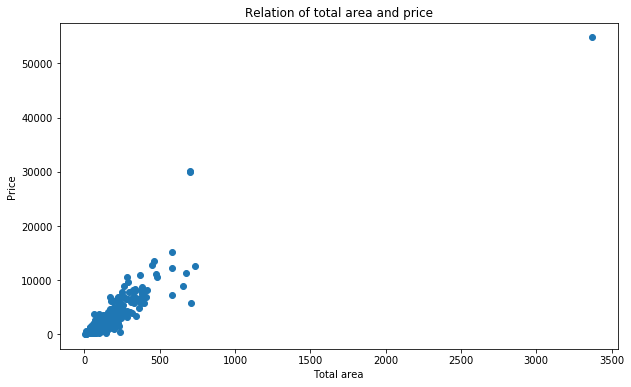

In [4]:
plt.figure(figsize=(10,6))
plt.title('Relation of total area and price')
plt.xlabel("Total area")
plt.ylabel("Price")
plt.scatter(x=df[['Building Area(m2)']], y=df[['Price']])
plt.show()

移除極端值

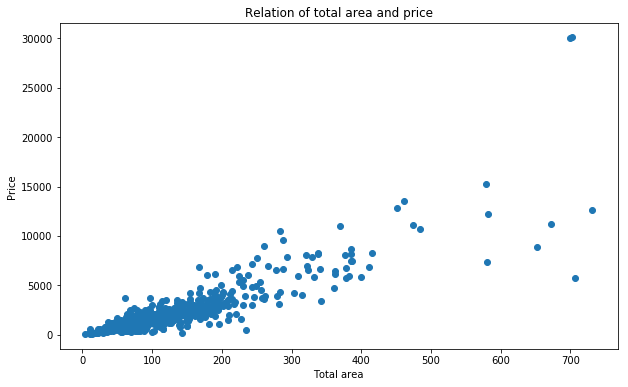

In [6]:
df = df[df['Building Area(m2)'] < 2000] # 移除極端值
plt.figure(figsize=(10,6))
plt.title('Relation of total area and price')
plt.xlabel("Total area")
plt.ylabel("Price")
plt.scatter(x=df[['Building Area(m2)']], y=df[['Price']])
plt.show()

## 母體相關係數/相依矩陣

呈現欄位與欄位之間的 "相關性"

數字越大，相關性越高

若用 numpy 也是可以利用 np.corrcoef 來一個一個組合成

但 pandas 可直接針對資料集，一次完成全部的 correlation coefficient

我們可以利用 heatmap 視覺化相依矩陣

matplotlib 當然能做到，但需要自行實作 function

而 seaborn 則直接提供了 heatmap 方法，所以就好好利用吧

In [7]:
df = df.drop(columns=['Type','Building Age']) # 將不必要的欄位丟棄
corr = df.corr() # 相依矩陣

corr

,Land Area(m2),Building Area(m2),Price,Price per area(NTD/m2),Parking Area((m2)),Parking Area,Age
Land Area(m2),1.000000,0.678440,0.514500,0.068584,0.389892,0.348161,-0.067932
Building Area(m2),0.678440,1.000000,0.862205,0.272360,0.736442,0.624706,-0.411173
Price,0.514500,0.862205,1.000000,0.566577,0.630954,0.683079,-0.403201
Price per area(NTD/m2),0.068584,0.272360,0.566577,1.000000,0.260050,0.367962,-0.362536
Parking Area((m2)),0.389892,0.736442,0.630954,0.260050,1.000000,0.739324,-0.464061
Parking Area,0.348161,0.624706,0.683079,0.367962,0.739324,1.000000,-0.359245
Age,-0.067932,-0.411173,-0.403201,-0.362536,-0.464061,-0.359245,1.000000


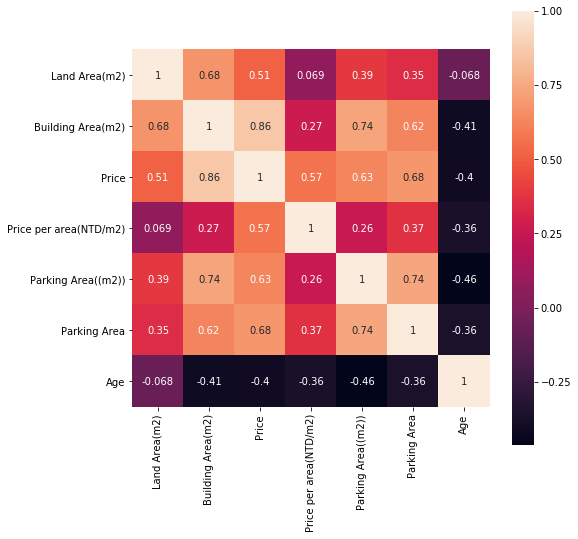

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True)
plt.show()

## 製作訓練/測試資料集

我們必須把資料分為 訓練集 和 測試集

利用測試集 測試 續練集 訓練出來的 model 或公式符合預期

利用 train_test_split 能夠方便設定資料比例，這裡設定是 7:3

In [9]:
X = df[['Building Area(m2)']]
y = df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
print(X_train.head())
print(X_test.head())

     Building Area(m2)
377              79.97
269              33.54
215             209.50
437             105.45
133             106.46
     Building Area(m2)
465             153.42
341             138.88
81               38.68
176             194.80
598             115.24


## 建立線性回歸模型

sklearn 中 linear_model 提供了許多回歸的模型

這裡創建了一個 LinearRegression

並起把訓練集 和 訓練集答案 fit 進去 (訓練 model)

過程非常快

訓練完，利用 predict 來預測 測試集

最後，利用 metrics 所提供的 RMSE & MAE 衡量預測數值的誤差

幾乎所有關於數值預測的資料，都會利用這兩種方法衡量

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # 訓練

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred = regr.predict(X_test) # 預測

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % mean_squared_error(pred, y_test))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(pred, y_test)))
print("R Square: %.2f" % r2_score(y_test, pred))

各變項參數: [[22.94310706]]
MSE: 997979.34
RMSE: 998.99
R Square: 0.71


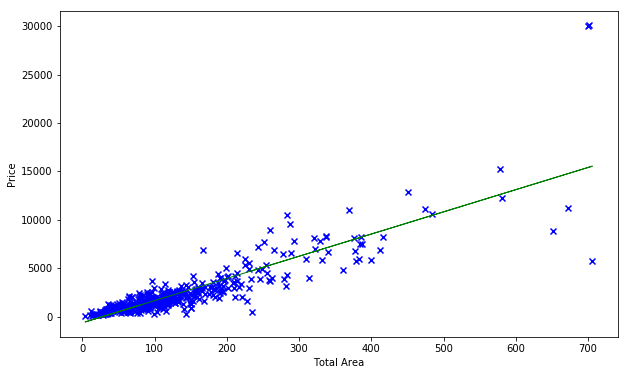

In [12]:
plt.figure(figsize=(10,6))  #調整作圖大小
plt.scatter(X_train, y_train,  color='blue', marker = 'x')
plt.plot(X_train, regr.predict(X_train), color='green', linewidth=1)

plt.ylabel('Price')
plt.xlabel('Total Area')

plt.show()

### 多變數 線性回歸

In [13]:
X = df[['Building Area(m2)','Land Area(m2)', 'Age']]
y = df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
print(X_train.head())
print(X_test.head())

     Building Area(m2)  Land Area(m2)      Age
292              66.74           0.00   2.8770
81               38.68          17.83  51.9079
634             340.30          53.42   3.9571
342              74.19          36.09  25.9490
216              31.01           2.83  34.9073
     Building Area(m2)  Land Area(m2)      Age
72               68.62           5.30  12.9582
232             124.34          12.61  31.8970
134             157.47          19.80   1.9888
485              96.77          13.61  32.9480
182             124.25          13.92   7.9887


In [14]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('各變項參數:', regr.coef_)
print("MSE: %.2f" % mean_squared_error(pred, y_test))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(pred, y_test)))
print("R Square: %.2f" % r2_score(pred, y_test))

各變項參數: [[ 25.69335039 -18.06503057   1.80650263]]
MSE: 1205327.37
RMSE: 1097.87
R Square: 0.71
